In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\budchris\anaconda3\envs\pythonadv\lib\site-packages (0.0)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# import csv to df
salary_df1 = pd.read_csv("../exported_data/salary_data1_new2.csv")
salary_df1.head()

,Unnamed: 0,id,salaryusd,primarydatabase,yearswiththisdatabase,employmentstatus,jobtitle,managestaff,yearswiththistypeofjob,otherpeopleonyourteam,education,educationiscomputerrelated,certifications,hoursworkedperweek,telecommutedaysperweek,employmentsector,region,averagesalaryusdbins
0,4496,4529,8000.0,Microsoft SQL Server,8,Full time employee,DBA,No,0,None,Associates (2 years),NaN,"No, I never have",40,"None, or less than 1 day per week",Private business,Western Europe,5000
1,5497,5535,2000.0,Microsoft SQL Server,7,Full time employee,DBA,No,1,4,Masters,Yes,"Yes, but they expired",40,5 or more,Private business,Eastern Europe,5000
2,5531,5569,2200.0,Other,2,Full time employee,Developer,No,2,2,Masters,Yes,"No, I never have",40,2,Private business,Eastern Europe,5000
3,5537,5575,3500.0,Microsoft SQL Server,12,Full time employee,Developer,No,15,3,Masters,No,"No, I never have",40,1,Private business,Eastern Europe,5000
4,5538,5576,2900.0,Microsoft SQL Server,8,Full time employee,DBA,No,8,2,Masters,NaN,"No, I never have",40,"None, or less than 1 day per week",Private business,Eastern Europe,5000


In [4]:
del salary_df1["Unnamed: 0"]

salary_df1 = salary_df1.dropna()

salary_df1

,id,salaryusd,primarydatabase,yearswiththisdatabase,employmentstatus,jobtitle,managestaff,yearswiththistypeofjob,otherpeopleonyourteam,education,educationiscomputerrelated,certifications,hoursworkedperweek,telecommutedaysperweek,employmentsector,region,averagesalaryusdbins
1,5535,2000.0,Microsoft SQL Server,7,Full time employee,DBA,No,1,4,Masters,Yes,"Yes, but they expired",40,5 or more,Private business,Eastern Europe,5000
2,5569,2200.0,Other,2,Full time employee,Developer,No,2,2,Masters,Yes,"No, I never have",40,2,Private business,Eastern Europe,5000
3,5575,3500.0,Microsoft SQL Server,12,Full time employee,Developer,No,15,3,Masters,No,"No, I never have",40,1,Private business,Eastern Europe,5000
6,5580,2400.0,Microsoft SQL Server,8,Full time employee,Developer,No,6,2,Doctorate/PhD,Yes,"Yes, but they expired",40,5 or more,Private business,Eastern Europe,5000
7,5581,3300.0,PostgreSQL,3,Full time employee,DBA,Yes,8,None,Bachelors (4 years),Yes,"Yes, and they're currently valid",35,5 or more,Private business,Eastern Europe,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6642,1290,250000.0,Microsoft SQL Server,16,Independent Consultant/Freelancer,DBA,No,16,1,Bachelors (4 years),No,"No, I never have",45,5 or more,Private business,North America,245000
6644,3947,250000.0,Microsoft SQL Server,20,Independent Consultant/Freelancer,DBA,No,25,None,Masters,Yes,"Yes, and they're currently valid",50,5 or more,Private business,North America,245000
6645,4147,250000.0,Microsoft SQL Server,16,Independent Consultant/Freelancer,Architect,No,16,None,Bachelors (4 years),Yes,"No, I never have",40,5 or more,Private business,North America,245000
6647,5119,250000.0,Microsoft SQL Server,20,Independent Consultant/Freelancer,Architect,Yes,22,More than 5,Masters,Yes,"Yes, and they're currently valid",60,3,Private business,Western Europe,245000


In [5]:
# sets X as every columns except koi_disposition
X1 = salary_df1.drop("averagesalaryusdbins", axis=1)
X2 = X1.drop("id", axis=1)
X = X2.drop("salaryusd", axis=1)
# sets y to koi_disposition
y = salary_df1["averagesalaryusdbins"].values.reshape(-1, 1)

print(X.shape, y.shape)

(5473, 14) (5473, 1)


In [6]:
X_encoded = pd.get_dummies(X)
print(X_encoded.shape, y.shape)

X_encoded



(5473, 63) (5473, 1)


,yearswiththisdatabase,yearswiththistypeofjob,hoursworkedperweek,primarydatabase_Amazon RDS (any flavor),primarydatabase_Azure SQL DB,primarydatabase_DB2,primarydatabase_Elasticsearch,primarydatabase_Microsoft Access,primarydatabase_Microsoft SQL Server,primarydatabase_MongoDB,...,employmentsector_Private business,region_Africa,region_Asia,region_Australia,region_Eastern Europe,region_Latin America,region_Middle East,region_North America,region_South America,region_Western Europe
1,7,1,40,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
2,2,2,40,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,12,15,40,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
6,8,6,40,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
7,3,8,35,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6642,16,16,45,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
6644,20,25,50,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
6645,16,16,40,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
6647,20,22,60,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn.neighbors import KNeighborsClassifier


# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=115, stratify=y)

In [8]:
X_train.head()

,yearswiththisdatabase,yearswiththistypeofjob,hoursworkedperweek,primarydatabase_Amazon RDS (any flavor),primarydatabase_Azure SQL DB,primarydatabase_DB2,primarydatabase_Elasticsearch,primarydatabase_Microsoft Access,primarydatabase_Microsoft SQL Server,primarydatabase_MongoDB,...,employmentsector_Private business,region_Africa,region_Asia,region_Australia,region_Eastern Europe,region_Latin America,region_Middle East,region_North America,region_South America,region_Western Europe
2906,4,4,40,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1467,6,6,40,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
6164,12,6,45,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5758,20,20,48,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
3874,10,2,45,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 1, Train/Test Score: 0.994/0.128


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 3, Train/Test Score: 0.469/0.119


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 5, Train/Test Score: 0.385/0.120


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 7, Train/Test Score: 0.345/0.125


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 9, Train/Test Score: 0.329/0.131


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 11, Train/Test Score: 0.309/0.131


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 13, Train/Test Score: 0.294/0.129


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 15, Train/Test Score: 0.281/0.129


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 17, Train/Test Score: 0.270/0.133


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 19, Train/Test Score: 0.264/0.131


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 21, Train/Test Score: 0.254/0.134


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 23, Train/Test Score: 0.256/0.141


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 25, Train/Test Score: 0.251/0.141


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 27, Train/Test Score: 0.242/0.137


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 29, Train/Test Score: 0.240/0.142


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 31, Train/Test Score: 0.237/0.128


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 33, Train/Test Score: 0.236/0.129


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 35, Train/Test Score: 0.229/0.124


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 37, Train/Test Score: 0.233/0.129


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 39, Train/Test Score: 0.224/0.131


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 41, Train/Test Score: 0.223/0.130


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 43, Train/Test Score: 0.218/0.126


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 45, Train/Test Score: 0.221/0.134


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 47, Train/Test Score: 0.219/0.132


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 49, Train/Test Score: 0.216/0.131


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 51, Train/Test Score: 0.212/0.131


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 53, Train/Test Score: 0.211/0.130


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 55, Train/Test Score: 0.210/0.123


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 57, Train/Test Score: 0.213/0.125


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 59, Train/Test Score: 0.211/0.126


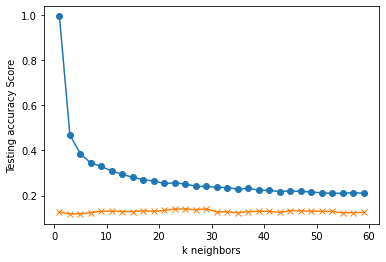

In [9]:

# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 60, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 60, 2), train_scores, marker='o')
plt.plot(range(1, 60, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [10]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train, y_train)
print('k=21 Test Acc: %.3f' % knn.score(X_test, y_test))

C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k=21 Test Acc: 0.134


In [11]:
print(f"Training Data Score: {knn.score(X_train, y_train)}")
print(f"Testing Data Score: {knn.score(X_test, y_test)}")

Training Data Score: 0.25389863547758285
Testing Data Score: 0.1344046749452155


In [12]:
knn.predict(X_test)[:10]

array([115000,  65000, 105000, 105000, 105000, 115000,  55000,  85000,
       105000,  55000], dtype=int64)

In [13]:
knn.predict_proba(X_test)[:10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.04761905, 0.19047619, 0.        ,
        0.14285714, 0.23809524, 0.04761905, 0.0952381 , 0.14285714,
        0.0952381 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.04761905, 0.        , 0.04761905,
        0.        , 0.28571429, 0.28571429, 0.0952381 , 0.23809524,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.0952381 ,
        0.0952381 , 0.04761905, 0.0952381 , 0.14285714, 0.04761905,
        0.19047619, 0.14285714, 0.0952381 , 0.04761905, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.

In [14]:
# Scale your data
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 1, Train/Test Score: 0.994/0.155


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 3, Train/Test Score: 0.482/0.138


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 5, Train/Test Score: 0.412/0.140


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 7, Train/Test Score: 0.373/0.155


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 9, Train/Test Score: 0.350/0.150


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 11, Train/Test Score: 0.331/0.155


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 13, Train/Test Score: 0.317/0.167


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 15, Train/Test Score: 0.304/0.164


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 17, Train/Test Score: 0.293/0.165


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 19, Train/Test Score: 0.282/0.169


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 21, Train/Test Score: 0.281/0.169


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 23, Train/Test Score: 0.269/0.178


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 25, Train/Test Score: 0.267/0.173


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 27, Train/Test Score: 0.260/0.168


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 29, Train/Test Score: 0.252/0.175


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 31, Train/Test Score: 0.253/0.184


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 33, Train/Test Score: 0.249/0.183


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 35, Train/Test Score: 0.249/0.178


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 37, Train/Test Score: 0.241/0.180


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 39, Train/Test Score: 0.241/0.190


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 41, Train/Test Score: 0.235/0.196


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 43, Train/Test Score: 0.235/0.194


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 45, Train/Test Score: 0.229/0.199


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 47, Train/Test Score: 0.234/0.197


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 49, Train/Test Score: 0.230/0.190


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 51, Train/Test Score: 0.234/0.186


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 53, Train/Test Score: 0.231/0.183


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 55, Train/Test Score: 0.230/0.178


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 57, Train/Test Score: 0.225/0.187


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 59, Train/Test Score: 0.225/0.186


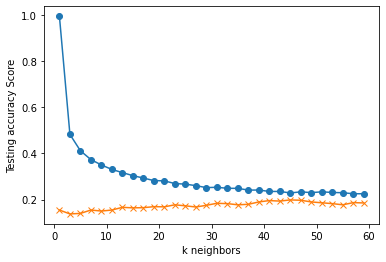

In [15]:

# Create the KNN Model
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 60, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 60, 2), train_scores, marker='o')
plt.plot(range(1, 60, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [16]:
print(f"Training Data Score: {knn.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test)}")

Training Data Score: 0.22538986354775828
Testing Data Score: 0.18553688823959094


In [17]:
knn.predict(X_test_scaled)[:10]

array([ 95000,  85000,  75000,  45000, 105000, 105000,  65000,  95000,
       105000,  35000], dtype=int64)

In [18]:
knn.predict_proba(X_test)[:10]

array([[0.03389831, 0.        , 0.        , 0.        , 0.01694915,
        0.        , 0.03389831, 0.03389831, 0.13559322, 0.05084746,
        0.10169492, 0.13559322, 0.13559322, 0.16949153, 0.05084746,
        0.        , 0.03389831, 0.        , 0.03389831, 0.01694915,
        0.01694915, 0.        , 0.        , 0.        , 0.        ],
       [0.05084746, 0.        , 0.        , 0.01694915, 0.01694915,
        0.        , 0.05084746, 0.06779661, 0.11864407, 0.08474576,
        0.06779661, 0.08474576, 0.10169492, 0.08474576, 0.06779661,
        0.06779661, 0.03389831, 0.01694915, 0.01694915, 0.03389831,
        0.        , 0.        , 0.01694915, 0.        , 0.        ],
       [0.05084746, 0.        , 0.        , 0.03389831, 0.01694915,
        0.        , 0.06779661, 0.06779661, 0.11864407, 0.05084746,
        0.13559322, 0.11864407, 0.06779661, 0.11864407, 0.03389831,
        0.03389831, 0.01694915, 0.        , 0.01694915, 0.03389831,
        0.01694915, 0.        , 0.        , 0.

In [19]:
k_range = list(range(1, 60, 2))
print(k_range)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59]


In [20]:

param_grid = dict(n_neighbors=k_range, weights = ['uniform', 'distance'], metric =['euclidean','manhattan'] )
print(param_grid)

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}


In [21]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(knn, param_grid, verbose =1, cv = 10, n_jobs = -1)

In [22]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  2.2min finished
C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=59), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43, 45, 47, 49, 51, 53, 55, 57, 59],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [23]:

print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'metric': 'manhattan', 'n_neighbors': 53, 'weights': 'distance'}
0.18616877336656576
KNeighborsClassifier(metric='manhattan', n_neighbors=53, weights='distance')


In [24]:
print(f"Training Grid Score: {grid.score(X_train_scaled, y_train)}")
print(f"Testing Grid Score: {grid.score(X_test_scaled, y_test)}")

Training Grid Score: 0.9946393762183235
Testing Grid Score: 0.17969320672023376


In [25]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test_scaled)

In [26]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        5000       0.33      0.07      0.12        14
       15000       0.43      0.36      0.39        28
       25000       0.17      0.06      0.09        32
       35000       0.10      0.04      0.06        48
       45000       0.17      0.11      0.13        66
       55000       0.12      0.09      0.10        90
       65000       0.21      0.33      0.26       139
       75000       0.21      0.19      0.20       130
       85000       0.16      0.22      0.19       148
       95000       0.17      0.23      0.20       156
      105000       0.19      0.28      0.22       145
      115000       0.17      0.18      0.17       119
      125000       0.10      0.08      0.09        92
      135000       0.23      0.11      0.15        63
      145000       0.00      0.00      0.00        36
      155000       0.33      0.04      0.07        25
      165000       0.00      0.00      0.00        14
      175000       0.00    

C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
